In [1]:
import numpy as np
import pandas as pd

In [2]:
#data
data=pd.read_csv('/content/StudentsPerformance (1).csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**1.Find out how many males and females participated in the test.**

In [4]:
gender_counts = data['gender'].value_counts()

# Print the counts
print("Number of males participated in test:", gender_counts['male'])
print("Number of females participated in test:", gender_counts['female'])

Number of males participated in test: 482
Number of females participated in test: 518


**2. What do you think about the students' parental level of education?**

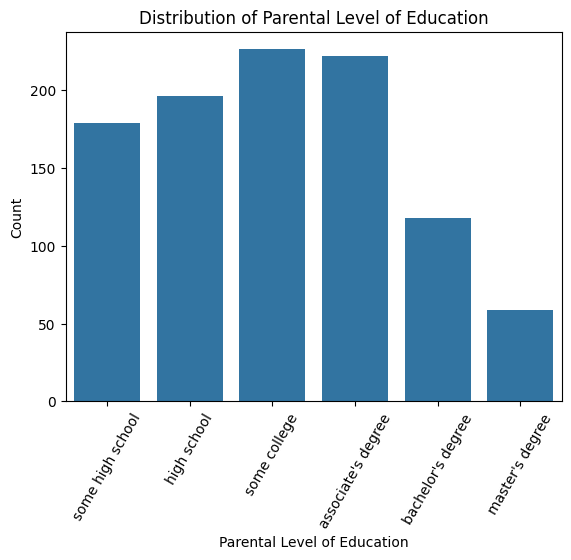

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
sns.countplot(data=data, x='parental level of education')
plt.title('Distribution of Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()


In [8]:
#parental level of education
parental_education=data.groupby('parental level of education').value_counts()
parental_education

parental level of education  gender  race/ethnicity  lunch         test preparation course  math score  reading score  writing score
associate's degree           female  group A         free/reduced  none                     37          57             56               1
                                                                                            41          51             48               1
                             male    group C         standard      none                     84          80             80               1
                                                                   completed                78          77             77               1
                                                                                            82          75             77               1
                                                                                                                                       ..
some high school             female  gr

 **3.Who scores the most on average for math, reading and writing based on**

● **Gender**
● **Test preparation course**

In [9]:
# Average of math,reading and writing based on gender
gender_scores=data.groupby('gender').mean(numeric_only=True)[['math score','reading score','writing score']]
gender_scores


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [10]:
# Average of math,reading and writing based on Test preperation course
test_prep_scores=data.groupby('test preparation course').mean(numeric_only=True)[['math score','reading score','writing score']]
test_prep_scores


,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


**4. What do you think about the scoring variation for math, reading and writing based on**

**● Gender**
**● Test preparation course**


In [11]:
#Scoring variation for math,reading and writing based on Gender
gender_variance=data.groupby('gender').var(numeric_only=True)[['math score','reading score','writing score']]
gender_variance

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In [12]:
#Scoring variation for math,reading and writing based on test preperation course
test_prep_variance=data.groupby('test preparation course').var(numeric_only=True)[['math score','reading score','writing score']]
test_prep_variance

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


**5.The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.**

In [13]:
# Sort the data by math score in descending order
sorted_data = data.sort_values(by='math score', ascending=False)

# Calculate the number of students in the top 25%
top_25_percent_count = int(25/100 * len(sorted_data))

# The top 25% of students based on math score
top_25_percent_students = sorted_data.head(top_25_percent_count)

# Print details of top-performing students
print("Top Performing Students ")
print(top_25_percent_students[['math score','gender']])


Top Performing Students 
     math score  gender
999         100    male
996         100    male
515         100  female
517         100  female
516         100  female
..          ...     ...
856          77    male
855          77    male
854          77    male
853          77    male
852          77    male

[250 rows x 2 columns]
